In [91]:
import seaborn as sns
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [92]:
df=pd.read_csv(r"C:\Users\rocky\Desktop\placement_training\project_data_analytics\ev\thereport.csv")

In [93]:
df.isnull().sum()

Year                  0
Month_Name            0
Date                  0
State                 0
Vehicle_Class         0
Vehicle_Category     10
Vehicle_Type         19
EV_Sales_Quantity     0
AQI                  22
dtype: int64

In [94]:
Category_type = {
    '2-Wheelers': ['2W_Personal', '2W_Shared'],
    '3-Wheelers': ['3W_Personal', '3W_Goods', '3W_Goods_LowSpeed','3W_Shared','3W_Shared_LowSpeed'],
    '4-Wheelers': ['4W_Personal', '4W_Shared'],
    'Bus': ['Bus','Institution Bus'],
    'Others': ['Others']
}

In [95]:
df['AQI'] = df.groupby(['State', 'Year'])['AQI'] \
    .transform(lambda x: x.ffill().bfill())

In [96]:
for category, types in Category_type.items():
    df["Vehicle_Type"] = np.where(
        df["Vehicle_Type"].isnull() & (df["Vehicle_Category"] == category),
        types[0],
        df["Vehicle_Type"]
    )

In [97]:
for category, types in Category_type.items():
    df["Vehicle_Category"] = np.where(
        df["Vehicle_Category"].isnull() & (df["Vehicle_Type"] == category),
        types[0],
        df["Vehicle_Category"]
    )

In [98]:
df.isnull().sum()

Year                 0
Month_Name           0
Date                 0
State                0
Vehicle_Class        0
Vehicle_Category     2
Vehicle_Type         0
EV_Sales_Quantity    0
AQI                  0
dtype: int64

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96845 entries, 0 to 96844
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               96845 non-null  int64  
 1   Month_Name         96845 non-null  object 
 2   Date               96845 non-null  object 
 3   State              96845 non-null  object 
 4   Vehicle_Class      96845 non-null  object 
 5   Vehicle_Category   96843 non-null  object 
 6   Vehicle_Type       96845 non-null  object 
 7   EV_Sales_Quantity  96845 non-null  int64  
 8   AQI                96845 non-null  float64
dtypes: float64(1), int64(2), object(6)
memory usage: 6.6+ MB


In [100]:
df.describe()

,Year,EV_Sales_Quantity,AQI
count,96845.000000,96845.000000,96845.000000
mean,2018.622768,37.108896,113.502876
std,2.895581,431.566675,47.936748
min,2014.000000,0.000000,30.000000
25%,2016.000000,0.000000,70.000000
50%,2019.000000,0.000000,115.000000
75%,2021.000000,0.000000,147.000000
max,2024.000000,20584.000000,305.000000


In [101]:
df['State'].unique()

array(['Andhra Pradesh', 'Arunachal Pradesh', 'Assam',
       'Andaman & Nicobar Island', 'Bihar', 'Chhattisgarh', 'Chandigarh',
       'DNH and DD', 'Delhi', 'Goa', 'Gujarat', 'Himachal Pradesh',
       'Haryana', 'Jharkhand', 'Karnataka', 'Kerala', 'Ladakh',
       'Maharashtra', 'Meghalaya', 'Madhya Pradesh', 'Mizoram',
       'Nagaland', 'Odisha', 'Punjab', 'Puducherry', 'Rajasthan',
       'Sikkim', 'Tamil Nadu', 'Tripura', 'Uttarakhand', 'Uttar Pradesh',
       'West Bengal', 'Jammu and Kashmir', 'Manipur'], dtype=object)

In [102]:
df['Vehicle_Class'].unique()

array(['ADAPTED VEHICLE', 'AGRICULTURAL TRACTOR', 'AMBULANCE',
       'ARTICULATED VEHICLE', 'BUS', 'CASH VAN', 'CRANE MOUNTED VEHICLE',
       'EDUCATIONAL INSTITUTION BUS', 'EXCAVATOR (COMMERCIAL)',
       'FORK LIFT', 'GOODS CARRIER', 'HARVESTER', 'MAXI CAB',
       'M-CYCLE/SCOOTER', 'MOTOR CAB', 'MOTOR CAR', 'OMNI BUS',
       'PRIVATE SERVICE VEHICLE', 'RECOVERY VEHICLE',
       'THREE WHEELER (PASSENGER)', 'TRACTOR (COMMERCIAL)',
       'TRAILER (AGRICULTURAL)', 'TRAILER (COMMERCIAL)',
       'TRAILER FOR PERSONAL USE', 'VEHICLE FITTED WITH RIG',
       'CAMPER VAN / TRAILER',
       'CONSTRUCTION EQUIPMENT VEHICLE (COMMERCIAL)', 'DUMPER',
       'EXCAVATOR (NT)', 'MOPED', 'THREE WHEELER (PERSONAL)',
       'THREE WHEELER (GOODS)', 'EARTH MOVING EQUIPMENT',
       'MOTOR CYCLE/SCOOTER-USED FOR HIRE',
       'CONSTRUCTION EQUIPMENT VEHICLE', 'M-CYCLE/SCOOTER-WITH SIDE CAR',
       'MOBILE WORKSHOP', 'OMNI BUS (PRIVATE USE)',
       'VEHICLE FITTED WITH COMPRESSOR',
       'CAMPER

In [103]:
df.groupby(["Year"]).agg({"EV_Sales_Quantity" : "sum"}).reset_index()

,Year,EV_Sales_Quantity
0,2014,2392
1,2015,7805
2,2016,49855
3,2017,87420
4,2018,130254
5,2019,166819
6,2020,124684
7,2021,331498
8,2022,1024723
9,2023,1525179


In [104]:
df.duplicated().sum()

0

In [105]:
df.head(5)

,Year,Month_Name,Date,State,Vehicle_Class,Vehicle_Category,Vehicle_Type,EV_Sales_Quantity,AQI
0,2014,jan,01-01-2014,Andhra Pradesh,ADAPTED VEHICLE,Others,Others,0,130.0
1,2014,jan,01-01-2014,Andhra Pradesh,AGRICULTURAL TRACTOR,Others,Others,0,130.0
2,2014,jan,01-01-2014,Andhra Pradesh,AMBULANCE,Others,Others,0,130.0
3,2014,jan,01-01-2014,Andhra Pradesh,ARTICULATED VEHICLE,Others,Others,0,130.0
4,2014,jan,01-01-2014,Andhra Pradesh,BUS,Bus,Bus,0,130.0


In [106]:
df.dtypes

Year                   int64
Month_Name            object
Date                  object
State                 object
Vehicle_Class         object
Vehicle_Category      object
Vehicle_Type          object
EV_Sales_Quantity      int64
AQI                  float64
dtype: object

In [107]:
df["Month_Name"] = df["Month_Name"].str.capitalize()
df["Month_Name"]

0        Jan
1        Jan
2        Jan
3        Jan
4        Jan
        ... 
96840    Jan
96841    Jan
96842    Jan
96843    Jan
96844    Jan
Name: Month_Name, Length: 96845, dtype: object

In [108]:
df["Date"] = pd.to_datetime(df["Date"])
df["Quarter"] = df["Date"].dt.quarter
df["Quarter"]

0        1
1        1
2        1
3        1
4        1
        ..
96840    1
96841    1
96842    1
96843    1
96844    1
Name: Quarter, Length: 96845, dtype: int32

In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96845 entries, 0 to 96844
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Year               96845 non-null  int64         
 1   Month_Name         96845 non-null  object        
 2   Date               96845 non-null  datetime64[ns]
 3   State              96845 non-null  object        
 4   Vehicle_Class      96845 non-null  object        
 5   Vehicle_Category   96843 non-null  object        
 6   Vehicle_Type       96845 non-null  object        
 7   EV_Sales_Quantity  96845 non-null  int64         
 8   AQI                96845 non-null  float64       
 9   Quarter            96845 non-null  int32         
dtypes: datetime64[ns](1), float64(1), int32(1), int64(2), object(5)
memory usage: 7.0+ MB


In [110]:
df.groupby(["State"]).agg({"EV_Sales_Quantity" : "sum"}).sort_values(by = "EV_Sales_Quantity", ascending = False).reset_index()

,State,EV_Sales_Quantity
0,Uttar Pradesh,732074
1,Maharashtra,401535
2,Karnataka,315498
3,Delhi,268538
4,Rajasthan,228573
5,Bihar,213465
6,Tamil Nadu,206902
7,Gujarat,176713
8,Assam,151917
9,Kerala,133246


In [111]:
df.groupby(['Vehicle_Class']).agg({"EV_Sales_Quantity":"sum"})

,EV_Sales_Quantity
Vehicle_Class,
ADAPTED VEHICLE,175
AGRICULTURAL TRACTOR,121
AMBULANCE,3
ANIMAL AMBULANCE,0
ARMOURED/SPECIALISED VEHICLE,0
...,...
TREE TRIMMING VEHICLE,0
VEHICLE FITTED WITH COMPRESSOR,0
VEHICLE FITTED WITH GENERATOR,0


In [112]:
df.groupby(["Vehicle_Category","Vehicle_Type"]).agg({"EV_Sales_Quantity" : "sum"})

EV_Sales_Quantity
Vehicle_Category Vehicle_Type                         
2-Wheelers       2W_Personal                   1796340
                 2W_Shared                       11765
3-Wheelers       3W_Goods                        44974
                 3W_Goods_LowSpeed               90656
                 3W_Personal                       421
                 3W_Shared                       76132
                 3W_Shared_LowSpeed            1408127
4-Wheelers       4W_Personal                    130676
                 4W_Shared                       19099
Bus              Bus                              7009
                 Institution Bus                     0
Others           Bus                                 0
                 Others                           8612

In [113]:
df.groupby("Quarter").agg({"EV_Sales_Quantity":"sum"})

,EV_Sales_Quantity
Quarter,
1,889330
2,724695
3,877928
4,1101858


In [114]:
month_order = ["Jan","Feb","Mar" , "Apr", "May", "Jun", "Jul", "Aug" ,"Sep", "Oct" , "Nov" , "Dec"]
df["Month_Name"] = pd.Categorical(df["Month_Name"], categories = month_order, ordered = True)

In [115]:
Mvv = df.groupby(["Month_Name","Vehicle_Category","Vehicle_Type"], observed=True).agg({"EV_Sales_Quantity" : "sum"}).head(30)
Mvv[Mvv["EV_Sales_Quantity"] > 0]

EV_Sales_Quantity
Month_Name Vehicle_Category Vehicle_Type                         
Jan        2-Wheelers       2W_Personal                    185693
                            2W_Shared                        2099
           3-Wheelers       3W_Goods                         4032
                            3W_Goods_LowSpeed                9023
                            3W_Personal                        48
                            3W_Shared                        9445
                            3W_Shared_LowSpeed             134366
           4-Wheelers       4W_Personal                     11923
                            4W_Shared                        2416
           Bus              Bus                               828
           Others           Others                            830
Feb        2-Wheelers       2W_Personal                    113260
                            2W_Shared                        1182
           3-Wheelers       3W_Goods                         2382
                            3W_Goods_LowSpeed                7485
                            3W_Personal                        27
                            3W_Shared                        2768
                            3W_Shared_LowSpeed              91812
           4-Wheelers       4W_Personal                      7789
                            4W_Shared                        1101
           Bus              Bus                               512
           Others           Others                            421
Mar        2-Wheelers       2W_Personal                    161671
                            2W_Shared                         769
           3-Wheelers       3W_Goods                         3963
                            3W_Goods_LowSpeed                9203
                            3W_Personal                        57

In [116]:
State_Kar = df[df["State"]=="Karnataka"]
State_Kar

,Year,Month_Name,Date,State,Vehicle_Class,Vehicle_Category,Vehicle_Type,EV_Sales_Quantity,AQI,Quarter
275,2014,Jan,2014-01-01,Karnataka,ADAPTED VEHICLE,Others,Others,0,120.0,1
276,2014,Jan,2014-01-01,Karnataka,AGRICULTURAL TRACTOR,Others,Others,0,120.0,1
277,2014,Jan,2014-01-01,Karnataka,AMBULANCE,Others,Others,0,120.0,1
278,2014,Jan,2014-01-01,Karnataka,ARTICULATED VEHICLE,Others,Others,0,120.0,1
279,2014,Jan,2014-01-01,Karnataka,BUS,Bus,Bus,0,120.0,1
...,...,...,...,...,...,...,...,...,...,...
96840,2024,Jan,2024-01-01,Karnataka,TRACTOR (COMMERCIAL),Others,Others,0,85.0,1
96841,2024,Jan,2024-01-01,Karnataka,TRAILER (AGRICULTURAL),Others,Others,0,85.0,1
96842,2024,Jan,2024-01-01,Karnataka,TRAILER (COMMERCIAL),Others,Others,0,85.0,1
96843,2024,Jan,2024-01-01,Karnataka,VEHICLE FITTED WITH GENERATOR,Others,Others,0,85.0,1


In [117]:
State_Kar.groupby("Year").agg({"EV_Sales_Quantity" : "sum"}).sort_values(by="EV_Sales_Quantity", ascending = False)

,EV_Sales_Quantity
Year,
2023,151272
2022,95934
2021,33314
2024,14191
2020,9716
2019,6152
2018,2302
2017,729
2015,682


In [118]:
State_Kar.groupby("Month_Name",observed = True).agg({"EV_Sales_Quantity" : "sum"}).sort_values(by="Month_Name")

,EV_Sales_Quantity
Month_Name,
Jan,33834
Feb,20510
Mar,27743
Apr,22741
May,26486
Jun,19114
Jul,22966
Aug,24727
Sep,26348


In [119]:
State_Kar.groupby("Quarter").agg({"EV_Sales_Quantity" : "sum"}).sort_values(by="Quarter")

,EV_Sales_Quantity
Quarter,
1,82087
2,68341
3,74041
4,91029


In [120]:
State_Kar.groupby("Vehicle_Class").agg({"EV_Sales_Quantity" : "sum"}).sort_values(by="EV_Sales_Quantity", ascending = False).head(20)#diff types of vehicles class sold in karnataka 

,EV_Sales_Quantity
Vehicle_Class,
M-CYCLE/SCOOTER,254789
MOTOR CAR,17016
MOTOR CYCLE/SCOOTER-USED FOR HIRE,11493
MOPED,6541
THREE WHEELER (GOODS),5959
MOTORISED CYCLE (CC > 25CC),5587
MOTOR CAB,5051
THREE WHEELER (PASSENGER),5000
E-RICKSHAW WITH CART (G),1615


In [121]:
State_Kar.groupby(["Vehicle_Category","Vehicle_Type"]).agg({"EV_Sales_Quantity" : "sum"}) #diff types of vehicles sold in karnataka grouped by category

EV_Sales_Quantity
Vehicle_Category Vehicle_Type                         
2-Wheelers       2W_Personal                    267178
                 2W_Shared                       11493
3-Wheelers       3W_Goods                         5959
                 3W_Goods_LowSpeed                1615
                 3W_Personal                        44
                 3W_Shared                        5000
                 3W_Shared_LowSpeed                833
4-Wheelers       4W_Personal                     17016
                 4W_Shared                        5073
Bus              Bus                               764
                 Institution Bus                     0
Others           Others                            523

In [122]:
sales_by_year = df.groupby('Year')['EV_Sales_Quantity'].sum() #sales by year 

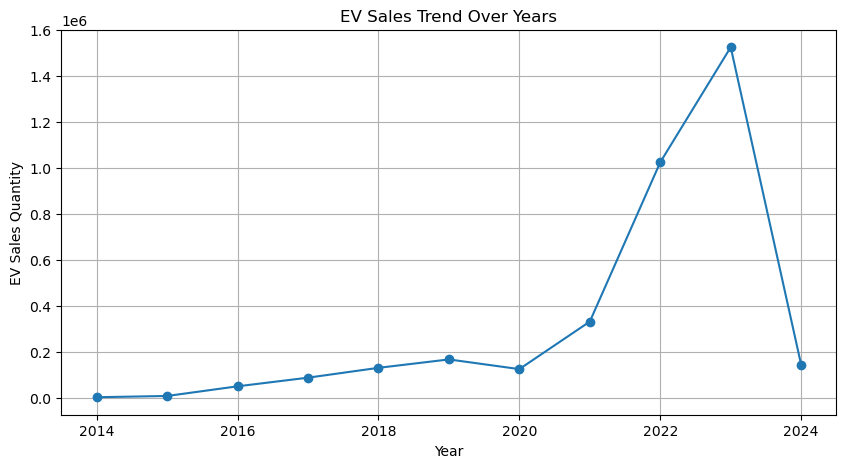

In [123]:
plt.figure(figsize=(10, 5))
sales_by_year.plot(kind='line', marker='o')
plt.title("EV Sales Trend Over Years")
plt.ylabel("EV Sales Quantity")
plt.grid(True)
plt.show()

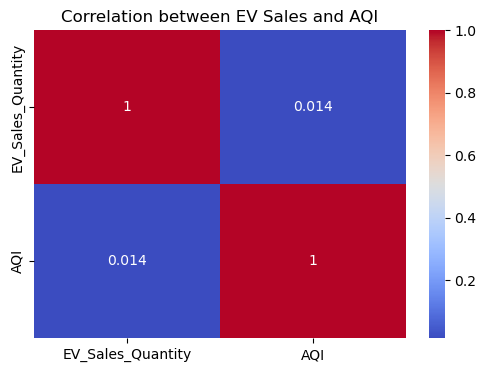

In [124]:
corr_matrix=df.corr(numeric_only=True)


plt.figure(figsize=(6, 4))
sns.heatmap(df[['EV_Sales_Quantity', 'AQI']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation between EV Sales and AQI")
plt.show()

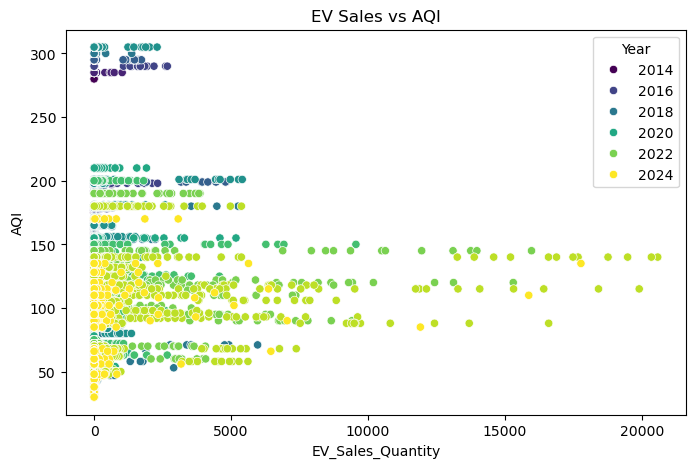

In [125]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='EV_Sales_Quantity', y='AQI', hue='Year', data=df, palette='viridis')
plt.title("EV Sales vs AQI")
plt.show()

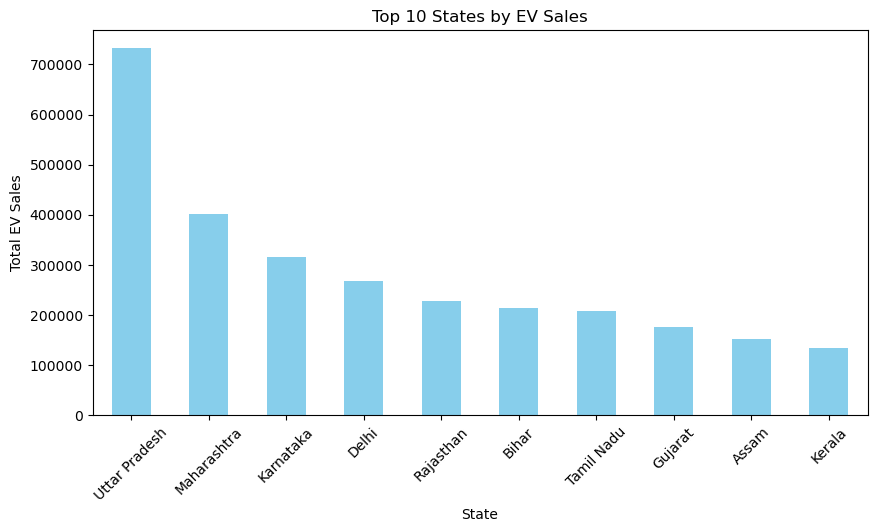

In [126]:
top_states = df.groupby('State')['EV_Sales_Quantity'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 5))
top_states.plot(kind='bar', color='skyblue')
plt.title("Top 10 States by EV Sales")
plt.ylabel("Total EV Sales")
plt.xticks(rotation=45)
plt.show()

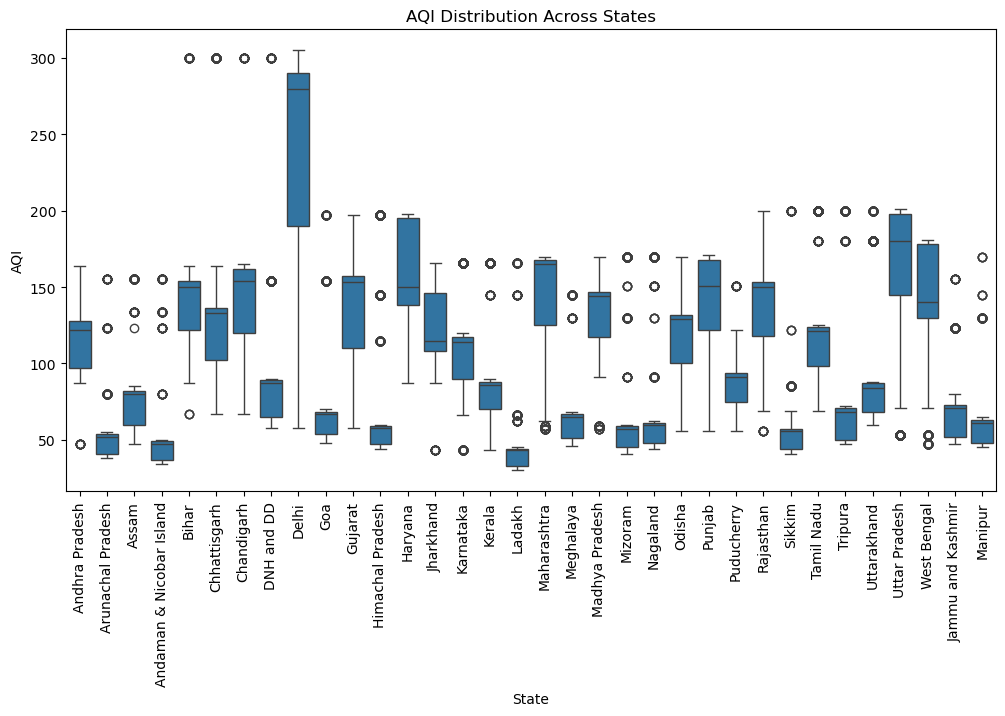

In [127]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='State', y='AQI', data=df)
plt.xticks(rotation=90)
plt.title("AQI Distribution Across States")
plt.show()

In [132]:
df.to_csv('final.csv',index=False)